/users/sergej.nowoshilow/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'whiskers': [<matplotlib.lines.Line2D at 0x2ac744d5e310>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac744d5ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac744d54d10>,
 'medians': [<matplotlib.lines.Line2D at 0x2ac744d6b890>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ac744d6bdd0>,
 'means': []}

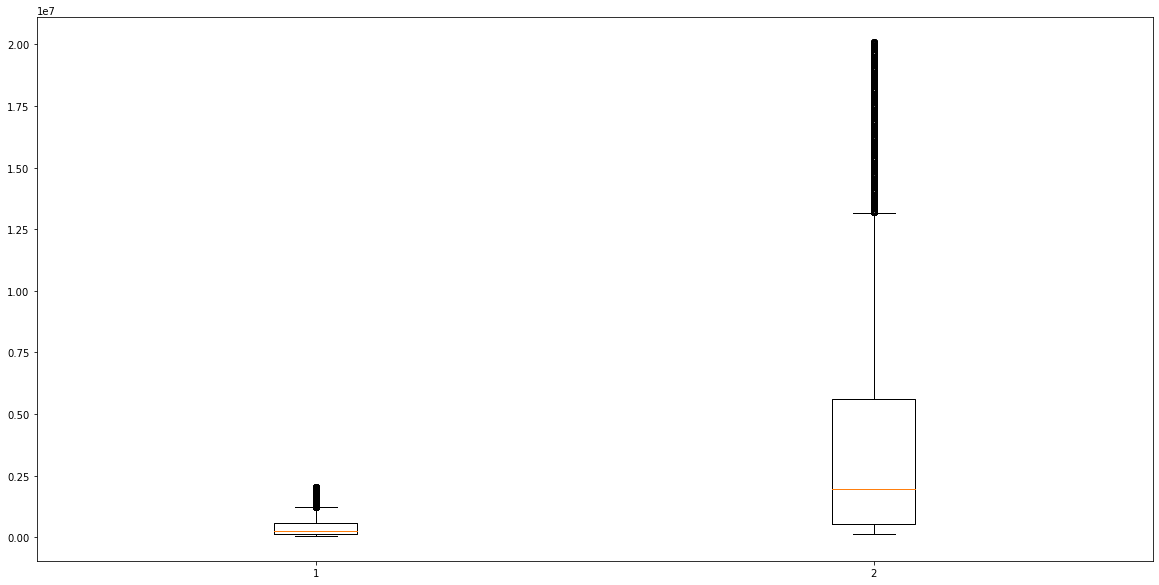

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import math

len_hs = []
with open('/groups/tanaka/Projects/axolotl-genome/current/work/TADs/HiCUP/refdata/homer/merged.TADs.100kb.bed', 'r') as hFile:
    for strLine in hFile.readlines():
        if strLine.startswith('#'):
            continue
        arrCols = strLine.rstrip().split('\t')
        len_hs.append(int(arrCols[2]) - int(arrCols[1]))
        
len_am = []
with open('/groups/tanaka/Projects/axolotl-genome/current/work/TADs/HiCUP/homer/Results/final.TAD.res100000.bed', 'r') as hFile:
    for strLine in hFile.readlines():
        if strLine.startswith('#'):
            continue
        arrCols = strLine.rstrip().split('\t')
        len_am.append(int(arrCols[2]) - int(arrCols[1]))
        
data = [len_hs, len_am]
plt.figure(figsize=(20,10))
plt.boxplot(data)

In [3]:
from scipy import stats

t2, p2 = stats.ttest_ind(len_hs,len_am)
print("t = " + str(t2))
print("p = " + str(p2))

t = -84.55260354074701
p = 0.0


/users/sergej.nowoshilow/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Human: 455354.58252427186
Axolotl: 4832576.913054986
t = -98.33275096961829
p = 0.0


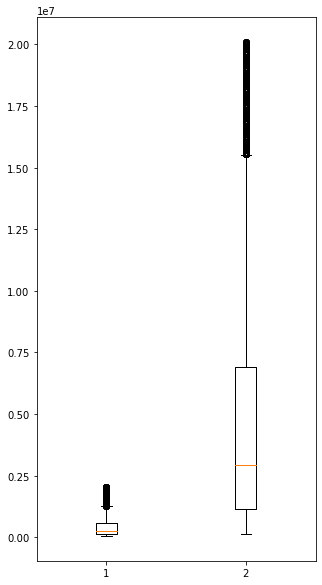

In [4]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import math

len_hs = []
with open('/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/compare_TADs/hg19.tads_nr.bed', 'r') as hFile:
    for strLine in hFile.readlines():
        if strLine.startswith('#'):
            continue
        arrCols = strLine.rstrip().split('\t')
        len_hs.append(int(arrCols[2]) - int(arrCols[1]))
        
len_am = []
with open('/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/compare_TADs/ambMex60DD.tads_nr.bed', 'r') as hFile:
    for strLine in hFile.readlines():
        if strLine.startswith('#'):
            continue
        arrCols = strLine.rstrip().split('\t')
        len_am.append(int(arrCols[2]) - int(arrCols[1]))
        
data = [len_hs, len_am]
plt.figure(figsize=(5,10))
d = plt.boxplot(data)
hs_mean = sum(len_hs)/len(len_hs)
print(f"Human: {hs_mean}")
am_mean = sum(len_am)/len(len_am)
print(f"Axolotl: {am_mean}")
plt.savefig('/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/figures/supp_boxplot.pdf', dpi=300)

t2, p2 = stats.ttest_ind(len_hs, len_am)
print(f"t = {t2}")
print(f"p = {p2}")

In [19]:
print(len(len_hs))
print(len(len_am))

12360
30226


/users/sergej.nowoshilow/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.0, 2500000.0)

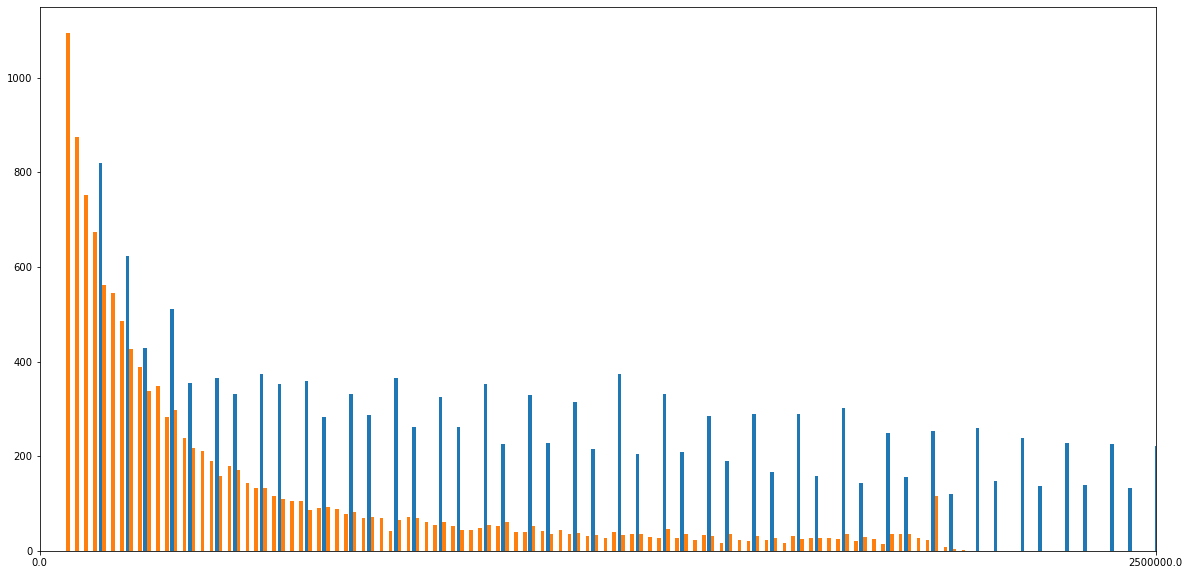

In [5]:
plt.figure(figsize=(20,10))
d = plt.hist([len_am, len_hs], bins=1000, histtype='bar')
xpos = plt.gca().get_xticks()
xlabs = list(map(lambda x: f'{x}', xpos))
d = plt.xticks(xpos, xlabs)
plt.xlim([0, 2500000])

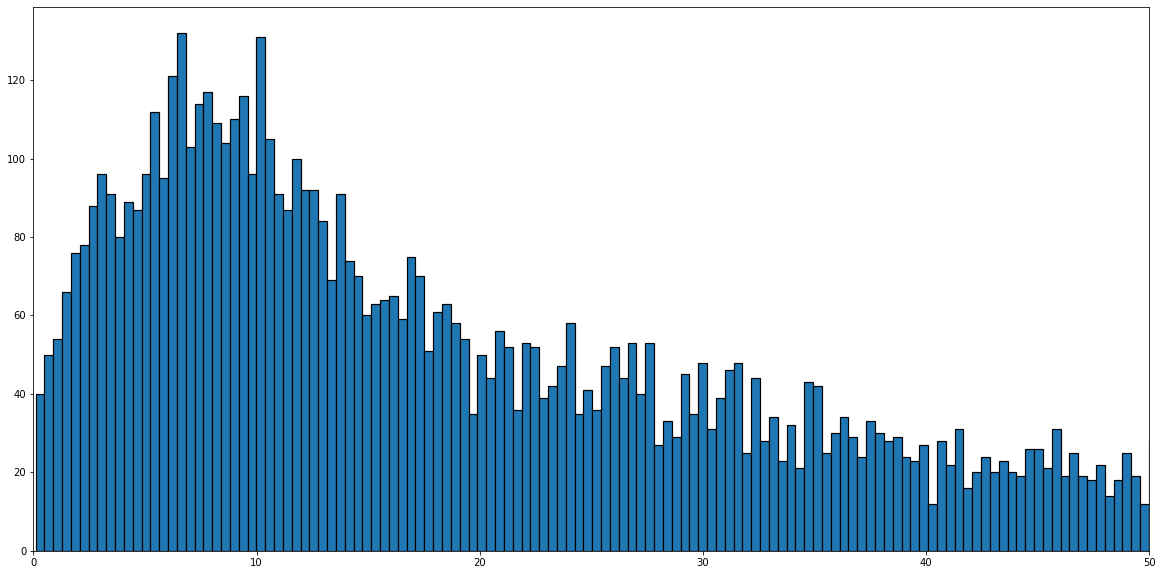

In [6]:
# Matching TADs
import re

filename = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/compare_TADs/matchin_tads.sizes'
with open(filename, 'r') as hFile:
    ratios = []
    p = re.compile('chr[^:]+:([0-9]+)-([0-9]+)\tchr[0-9]+[pq]:([0-9]+)-([0-9]+)')
    for line in hFile.readlines():
        m = p.search(line.strip())
        if m:
            ratios.append( (int(m.group(4)) - int(m.group(3))) / (int(m.group(2)) - int(m.group(1))) )
        else:
            print(f"WHAT?: {line}")
plt.figure(figsize=(20,10))
d = plt.hist(ratios, bins=1000, edgecolor='black', linewidth=1.2)
plt.xlim([0, 50])
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.savefig('/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/figures/fig3/3a.pdf', dpi=300)

In [7]:
len(ratios)

9408

In [ ]:
import sys
print (sys.version)

In [1]:
import sys
print (sys.version)

3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
